# News Text Classifcation 
Based on "Deep Learning with Python by François Chollet"

## Importing key libraries

In [1]:
# To avoid warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For visualization
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import keras
import numpy as np
from keras.datasets import reuters

Using TensorFlow backend.


## Splitting data into test and train set

In [4]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [5]:
print('train data: ' + str(len(train_data)))
print('test data: ' + str(len(test_data)))

train data: 8982
test data: 2246


In [6]:
print(train_data[10])

[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [7]:
# Reading inside the train_data
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


**In text analysis, most text books use tokenizer. We instead use vectorizer method**

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
      results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

## create a one-hot (categorical) encoding

In [10]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

In [11]:
one_hot_train_lables = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

**Alternatively, we may use pre-built keras method**

In [12]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

# Model

In [13]:
from keras import models
from keras import layers
from keras.layers import Dense, Dropout, Activation

model = models.Sequential()

In [14]:
model.add(layers.Dense(46, activation='relu', input_shape=(10000,)))
model.add(Dropout(0.5))
model.add(layers.Dense(46, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [15]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 46)                460046    
_________________________________________________________________
dropout_1 (Dropout)          (None, 46)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2162      
_________________________________________________________________
dense_3 (Dense)              (None, 46)                2162      
Total params: 464,370
Trainable params: 464,370
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Try with different optimizer to check results
#model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
x_val = x_train[:1000] # LAst 1000 items
partial_x_train = x_train[1000:] # first 1000 items

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [19]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=516,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 224us/step - loss: 3.4197 - acc: 0.3405 - val_loss: 2.8544 - val_acc: 0.5230
Epoch 2/20
7982/7982 [==============================] - 1s 186us/step - loss: 2.4410 - acc: 0.4805 - val_loss: 1.8967 - val_acc: 0.5860
Epoch 3/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.8141 - acc: 0.5866 - val_loss: 1.5325 - val_acc: 0.6540
Epoch 4/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.5098 - acc: 0.6559 - val_loss: 1.3516 - val_acc: 0.6820
Epoch 5/20
7982/7982 [==============================] - 1s 188us/step - loss: 1.3427 - acc: 0.6922 - val_loss: 1.2463 - val_acc: 0.7180
Epoch 6/20
7982/7982 [==============================] - 1s 170us/step - loss: 1.2180 - acc: 0.7154 - val_loss: 1.1750 - val_acc: 0.7390
Epoch 7/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.1207 - acc: 0.7397 - val_loss: 1.1174 - val_acc: 0.7580


**Final results**<br>
- Train accuracy: 88% ; Loss:0.45
- Validation accuracy: 81% ; Loss:0.91

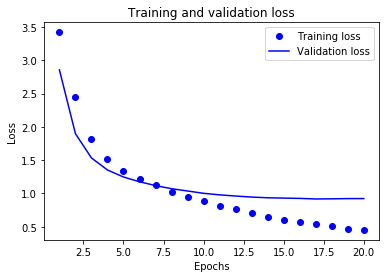

<Figure size 432x288 with 0 Axes>

In [20]:
import matplotlib.pyplot as plt # pylint disable=E0401

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.clf()

In [21]:
accuracy = history.history['acc']
val_acc = history.history['val_acc']

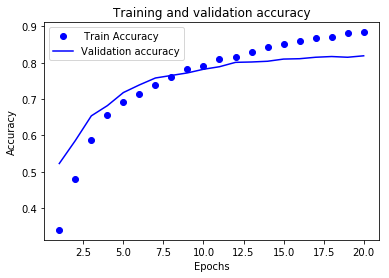

In [22]:
plt.plot(epochs, accuracy, 'bo', label=' Train Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Training accuracy is still imporoving but validation accuracy is stagnant(becoming constant)**<br>
Training accuracy is going upto 88% .If we keep it up, we might get even higher accuracy results. On other end, validation accuracy hovers around 80-81%. <br>
Hence, adding more epochs would not make results any better.